### Система мягких сфер
$$
    \Phi(r) = \varepsilon\left(\frac{\sigma}{r}\right)^n, \; n\in(3,+\infty)\\
    F=-T\ln{Z}
    Z_n=\int\frac{d^{3N}pd^{3N}q}{N!h^{3N}}\rho e^{-\beta H(p,q)}=
    \frac{1}{N!h^{3N}}\int e^{-\sigma^n\frac{\varepsilon}{kT}\sum r_{ij}^{-n}}d\overline{r}^N=\\=
    \frac{V^N}{N!h^{3N}}
    \int\exp\left(-\tilde{\rho}^{\frac{n}{3}}\frac{\varepsilon}{kT}\sum s_{ij}^{-n}\right)d\overline{s}^N=
    \frac{V^N}{N!h^{3N}}
    \int\exp{\left[-\left(\frac{6\zeta}{\pi}\right)^{\frac{3}{n}}\sum s_{ij}^{-n}\right]}d\overline{s}^N,
$$

где 
$$
    \overline{s}=\overline{r}\left(\frac{N}{V}\right)^{\frac{1}{3}}, \;
    \Lambda = \frac{h^2}{2\pi mkT}, \; 
    \tilde{\rho} = \frac{N\sigma^3}{V}
$$

Таким образом, свободная энергия зависит только от парамметра $\zeta=\frac{\pi}{6}\left(\frac{\varepsilon}{kT}\right)^{\frac{3}{n}}\rho\sigma^3, \; \rho=\frac{N}{V}$.

Таким образом, для одного и того же $\zeta$ величины $\frac{pV}{NkT}$, $\frac{E}{NkT}$, $D\left(\frac{N}{V}\right)^{\frac{1}{3}}\left(\frac{m}{kT}\right)^{\frac{1}{2}}$ и другиие одинаковы.

Выбираем $n=6$, $\zeta=1.18$ (соответствует точке плавления). Гранецентрированная решётка ($N=4s^3=256$).

Также посмотрим систему при $\zeta=1.5$ (кристал) и $\zeta=0.8$ (жидкость). Нужно применить алгоритм Метрополиса с периодическими граничными условиями.

### Теорема вириала для систеемы мягких сфер.

Вириал $\sum \overline{F}_i\overline{r}_i$.

Теорема: $2\left<T\right>=-\sum\limits_{i=1}^N\overline{F}_i\overline{r}_i$

Для однородных потенциалов $2\left<T\right>=n\left<U\right>$.

Можно показать, что $\frac{1}{3}\left<\sum \overline{F}_i\overline{r}_i\right>=-k$

### Алгоритм Метрополиса
1. Выбираем случайную частицу и сдвигаем её на случайный вектор
2. Считаем $\Delta E$
3. Если $\Delta E < 0$, то принимаем новую конфигурацию
4. Иначе если $\xi < \exp\left(-\frac{\Delta E}{T}\right)$, то принимаем новую конфигурацию ($\xi\in(0, 1)$)
5. Иначе берём старую конфигурацию вместо новой

In [1]:
import numpy as np
from numpy import sqrt

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from random import randint

In [2]:
a = 1 #lattice constant

#inicial cube of face-centered lattice
cube = [(0, 0, 0), 
        (a, 0, 0), 
        (0, a, 0), 
        (a, a, 0), 
        (0, 0, a), 
        (a, 0, a), 
        (0, a, a), 
        (a, a, a),#end of usual cubic lattice
        (a/2, a/2, 0),
        (a/2, 0, a/2),
        (0, a/2, a/2),
        (a/2, a/2, a),
        (a/2, a, a/2),
        (a, a/2, a/2)]#end of face-centered lattice

In [3]:
#Calculates distances between two vectors in a cell with periodic conditions
#N is a size of the lattice in a units
def distance(A, B, N=4, a=1):
    distances = []
    for i in range(-1, 2):
        for j in range(-1, 2):
            for k in range(-1, 2):
                distances.append(sqrt((A[0] + i * a * N - B[0])**2 + 
                                      (A[1] + j * a * N - B[1])**2 + 
                                      (A[2] + k * a * N - B[2])**2))
    
    return min(distances)

In [4]:
#This function shifts the initial cube by given (dx, dy, dz) directions, where dx, dy, dz are integers
def generate_cube(dx, dy, dz, a, initial_cube):#in units of a
    def add(vec_1, vec_2):
        return (vec_1[0] + vec_2[0], vec_1[1] + vec_2[1], vec_1[2] + vec_2[2])
    
    d_vec = (dx * a, dy * a, dz * a)

    return [add(i, d_vec) for i in cube]


In [5]:
#Create cubic cell
N = 4 #number of cubes in a row

set_of_coordinates = set()
for x in range(N):
    for y in range(N):
        for z in range(N):
            new_cube = generate_cube(x, y, z, a, cube)
            for coord in new_cube:
                if (coord[0] != N and coord[1] != N and coord[2] != N):
                    set_of_coordinates.add(coord)


coordinates_of_all_atoms_in_lattice = list(set_of_coordinates)

print("Number of atoms: " + str(len(coordinates_of_all_atoms_in_lattice)))

Number of atoms: 256


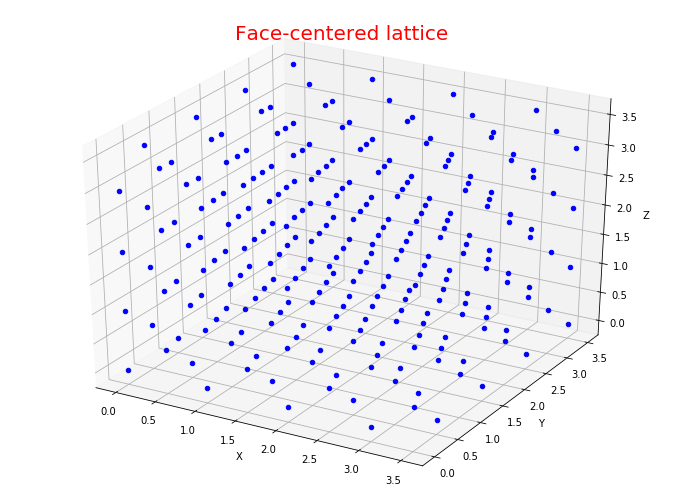

In [6]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

for coord in coordinates_of_all_atoms_in_lattice:
    ax.scatter(coord[0], coord[1], coord[2], color='blue')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("Face-centered lattice", fontsize=20, color='red')

plt.show()

In [7]:
#Define potential
number_of_atoms = len(coordinates_of_all_atoms_in_lattice)
varepsilon = 1
sigma = 1
n = 6
zeta = 1.18
rho = number_of_atoms / (N * a)**3
T = (np.pi * rho * sigma ** 3 / (6 * zeta)) ** (n / 3) * varepsilon


((6 * zeta) / (np.pi * rho * sigma ** 3)) ** (n / 3)

def Phi(r, varepsilon=1, sigma=1, n = 6):
    return varepsilon * (sigma / r) ** n

In [8]:
#Let's find full energy
E_0 = 0

for i in range(number_of_atoms):
    for j in range(i, number_of_atoms):
        if(i != j):
            E_0 += Phi(distance(coordinates_of_all_atoms_in_lattice[i], coordinates_of_all_atoms_in_lattice[j], N=N, a=a))
print("Full energy: E = " + str(E_0))

Full energy: E = 14629.196651952157


In [9]:
#Generators of random uniform value and random int
def next_random_uniform_value(delta = a/20):
    while 1:
        yield np.random.uniform(-1 * delta, delta)

def next_random_int(number_of_atoms = number_of_atoms):
    while 1:
        yield np.random.randint(number_of_atoms)
        
        
ruv = next_random_uniform_value()
ri = next_random_int()
#next(ruv), next(ri)

In [10]:
#All atoms stay in initial box
def periodic_boundaries(number, N=N, a=a):
    k = number
    if(k < 0):
        while (k < 0):
            k += N * a
        return k
    elif(k > N * a):
        while (k > N * a):
            k -= N * a
        return k
    else:
        return k

In [11]:
def metropolis_algorithm_condition(atoms, accepted, non_accepted):
    i = next(ri)
    def energy(coord, i=i):
        E = 0
        for j in range(number_of_atoms):
            if(i!= j):
                E += Phi(distance(coord, atoms[j], N=N, a=a))
        return E
    
    
    coord_old = atoms[i]
    coord_new = (periodic_boundaries(next(ruv) + coord_old[0]), \
                 periodic_boundaries(next(ruv) + coord_old[1]), \
                 periodic_boundaries(next(ruv) + coord_old[2]))
    
                     
    E_old = energy(coord_old, i)
    E_new = energy(coord_new, i)
    delta_E = E_new - E_old
    
    if (delta_E < 0):
        accepted += 1
        return coord_new, delta_E, i, accepted, non_accepted
    elif(delta_E > 0 and np.random.random() < np.exp(-1 * delta_E / T)):
        accepted += 1
        return coord_new, delta_E, i, accepted, non_accepted
    else:
        non_accepted += 1
        return coord_old, 0, i, accepted, non_accepted

In [12]:
iters = 200000 

E = np.zeros(iters + 1)
E[0] = E_0

accepted = 0
non_accepted = 0
atoms = coordinates_of_all_atoms_in_lattice


#import time
#start = time.time()
for ll in range(iters):
#    if (ll % 100 == 0):
#        print(ll)
    coord, delta_E, index, accepted, non_accepted = metropolis_algorithm_condition(atoms, accepted, non_accepted)
    atoms[index] = coord
    E[ll + 1] = E[ll] + delta_E
#print('--- seconds --- ' + str(time.time() - start))    
print("Accepted: " + str(accepted))
print("Non accepted: " + str(non_accepted))

np.save("atoms", atoms)
np.save("energy", E)

Accepted: 104322
Non accepted: 95678


In [13]:
print("Accepted: " + str(accepted))
print("Non accepted: " + str(non_accepted))

Accepted: 104322
Non accepted: 95678


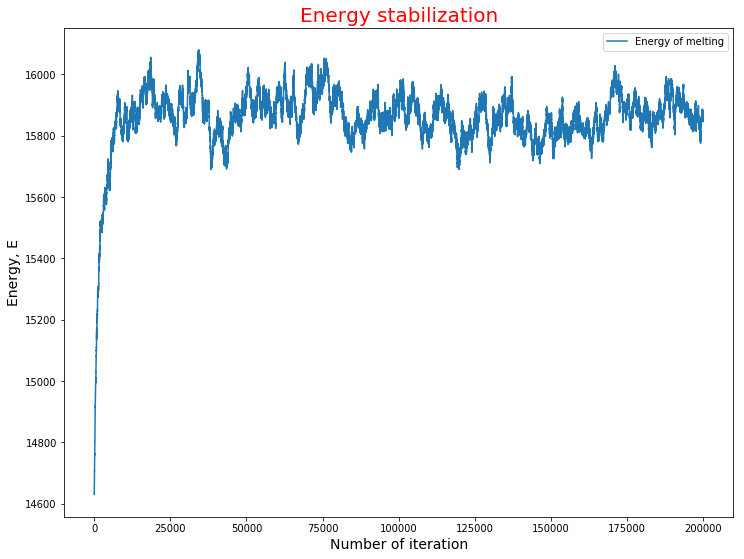

In [14]:
fig = plt.figure(figsize = (12, 9))

plt.plot(E, label='Energy of melting')
plt.xlabel('Number of iteration', fontsize=14)
plt.ylabel('Energy, E', fontsize=14)

plt.title('Energy stabilization', fontsize=20, color='red')

plt.legend()


plt.show()

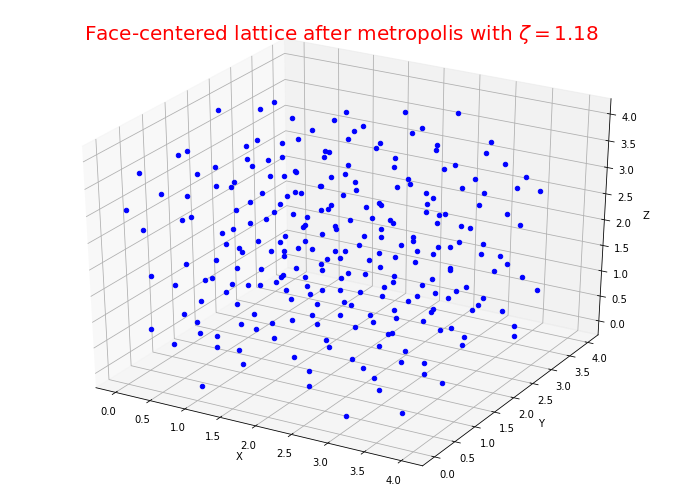

In [15]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

for coord in atoms:
    ax.scatter(coord[0], coord[1], coord[2], color='blue')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("Face-centered lattice after metropolis with $\\zeta=1.18$", fontsize=20, color='red')

plt.show()

In [16]:
non_accepted

95678